## Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Variable	Definition

In [124]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## Importing Libraries and Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")

In [70]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [71]:
data.shape

(550068, 12)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

## Checking Null values

In [73]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Value in percentage

In [74]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

# Unique elements in each attributes

In [75]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

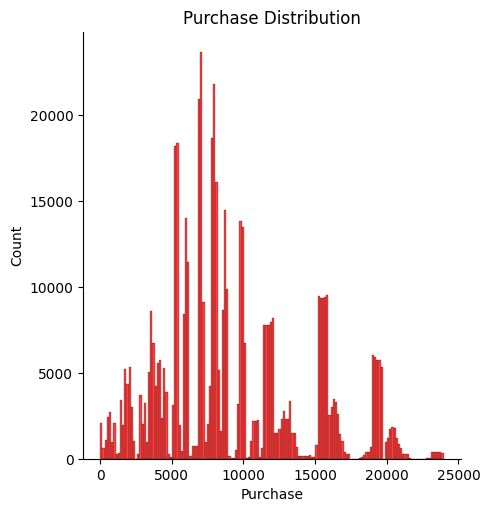

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a valid DataFrame containing a column named "Purchase"
sns.displot(data["Purchase"], color='r')
plt.title("Purchase Distribution")
plt.show()


## Target Variable Purchase

C:\Users\sathe\AppData\Local\Temp\ipykernel_19868\2016751557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')


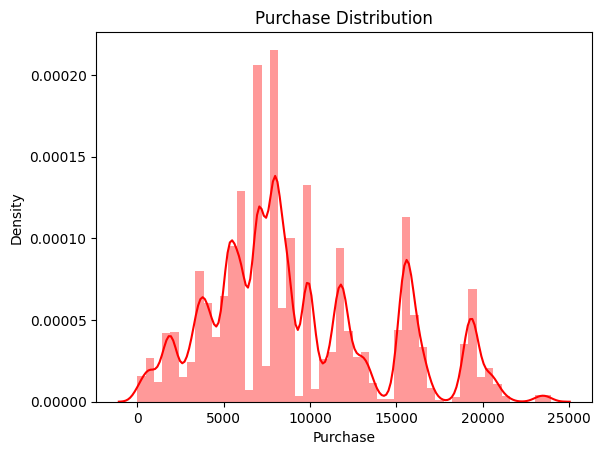

In [78]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

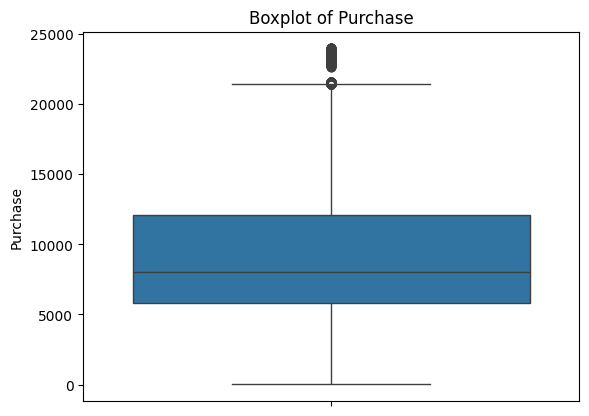

In [79]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [80]:
data["Purchase"].skew()

0.6001400037087128

In [81]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [82]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

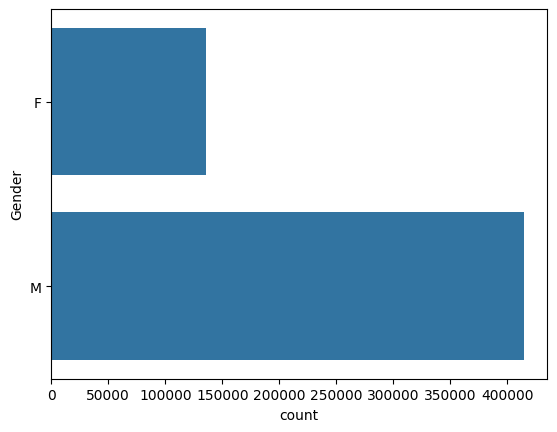

In [83]:
sns.countplot(data['Gender'])
plt.show()

In [84]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [85]:
import pandas as pd

# Load DataFrame from CSV
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")

# Convert "Purchase" column to numeric type if it's not already
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')

# Handle missing values if any
data.dropna(subset=['Purchase'], inplace=True)  # Drop rows with missing values in "Purchase" column

# Check the data type of "Purchase" column
print("Data type of 'Purchase' column:", data['Purchase'].dtype)

# Check unique values in "Purchase" column
print("Unique values in 'Purchase' column:", data['Purchase'].unique())

# Try using custom aggregation function to see if it helps
purchase_means_by_gender = data.groupby("Gender")["Purchase"].agg(lambda x: x.mean())
print(purchase_means_by_gender)


Data type of 'Purchase' column: int64
Unique values in 'Purchase' column: [ 8370 15200  1422 ...   135   123   613]
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


There are more males than females

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

There are more unmarried people in the dataset who purchase more

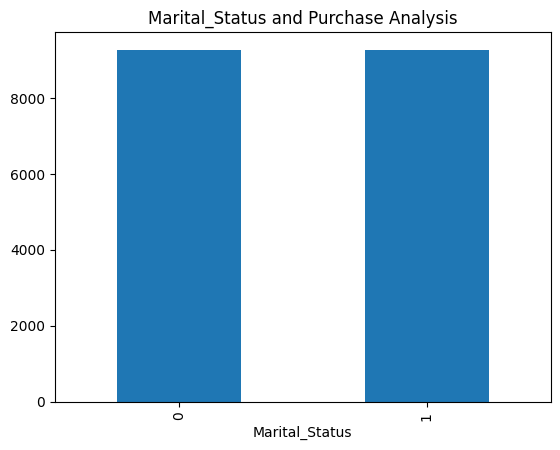

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
# Load DataFrame from CSV
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
purchase_means_by_marrial_status = data.groupby("Marital_Status")["Purchase"].agg(lambda x: x.mean())
purchase_means_by_marrial_status.plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [2]:
import pandas as pd
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
purchase_means_by_occup=data.groupby("Occupation")["Purchase"].agg(lambda x: x.mean())
occup = pd.DataFrame(purchase_means_by_occup)
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


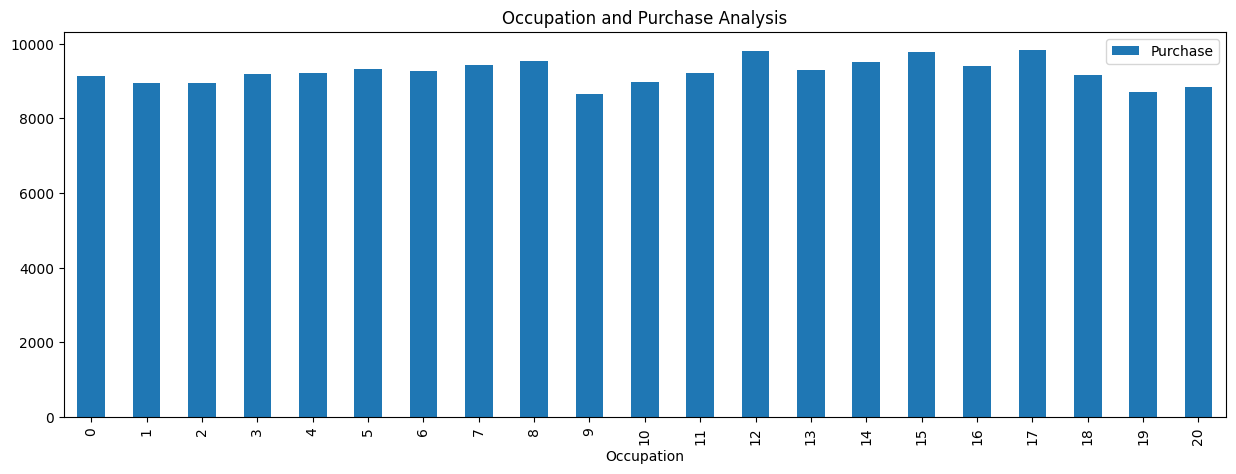

In [4]:
import matplotlib.pyplot as plt
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

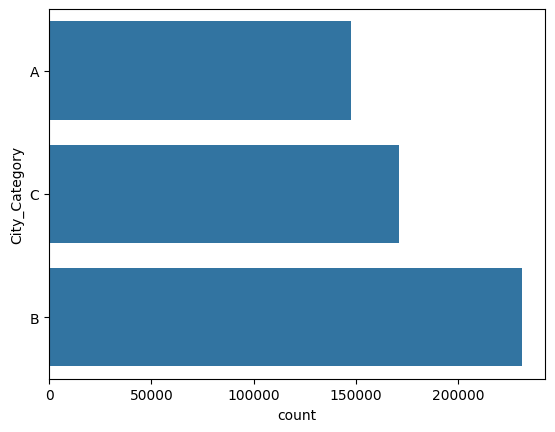

In [6]:
import seaborn as sns
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

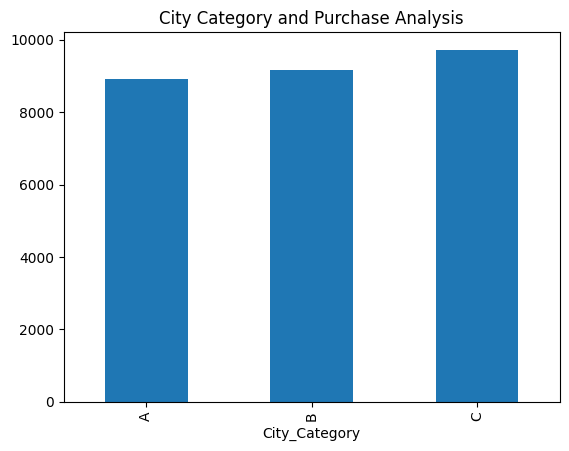

In [7]:
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
purchase_means_by_city=data.groupby("City_Category")["Purchase"].agg(lambda x: x.mean())

purchase_means_by_city.plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

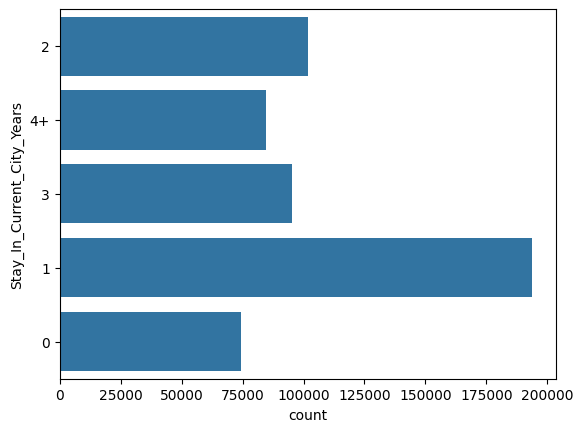

In [8]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

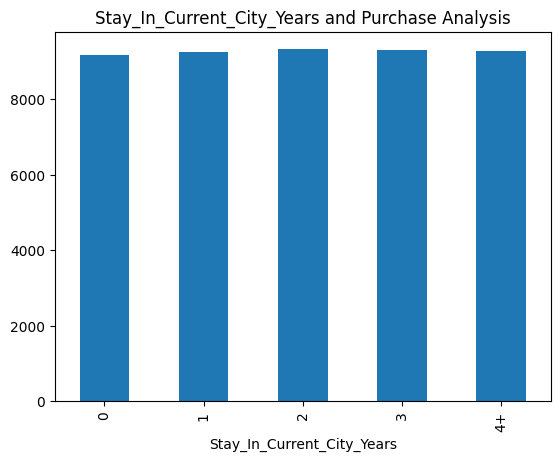

In [9]:
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
purchase_means_by_current_city=data.groupby("Stay_In_Current_City_Years")["Purchase"].agg(lambda x: x.mean())
purchase_means_by_current_city.plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

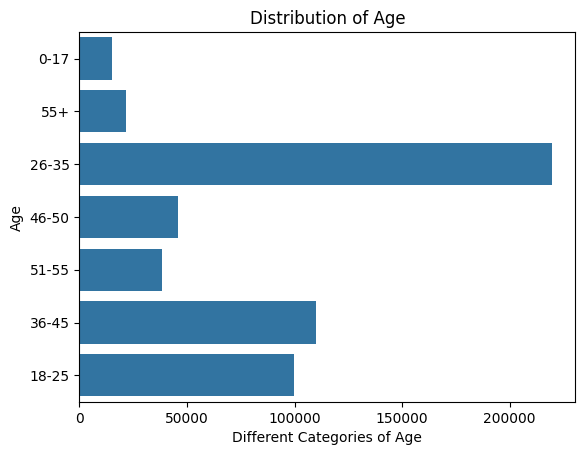

In [10]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

<Axes: xlabel='Age'>

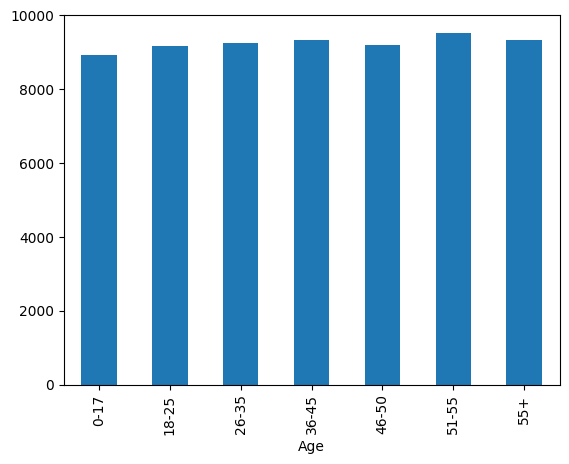

In [11]:

purchase_means_by_age=data.groupby("Age")["Purchase"].agg(lambda x: x.mean())

purchase_means_by_age.plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

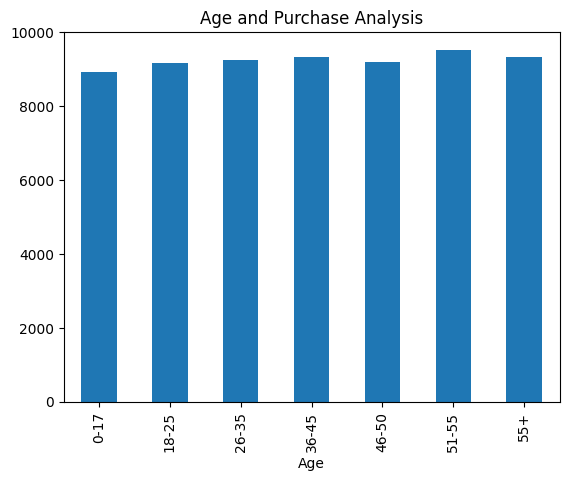

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
purchase_means_by_agesum=data.groupby("Age")["Purchase"].agg(lambda x: x.mean())
purchase_means_by_agesum.plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

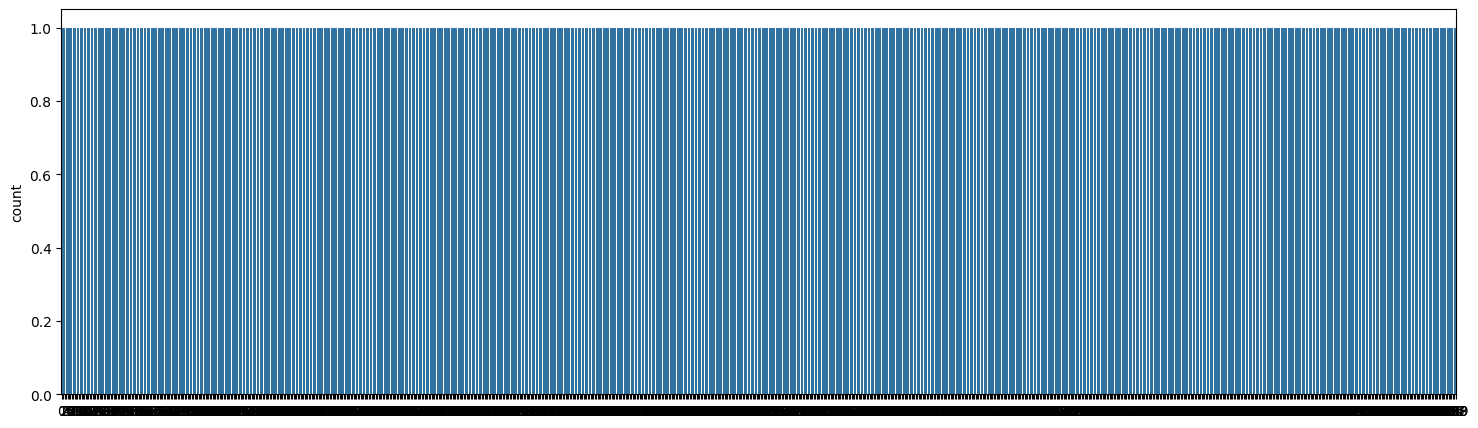

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
    plt.figure(figsize=(18, 5))
    sns.countplot(data['Product_Category_1'].head(1000))
    plt.show()
except KeyboardInterrupt:
    print("KeyboardInterrupt: Code execution interrupted by the user.")


It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

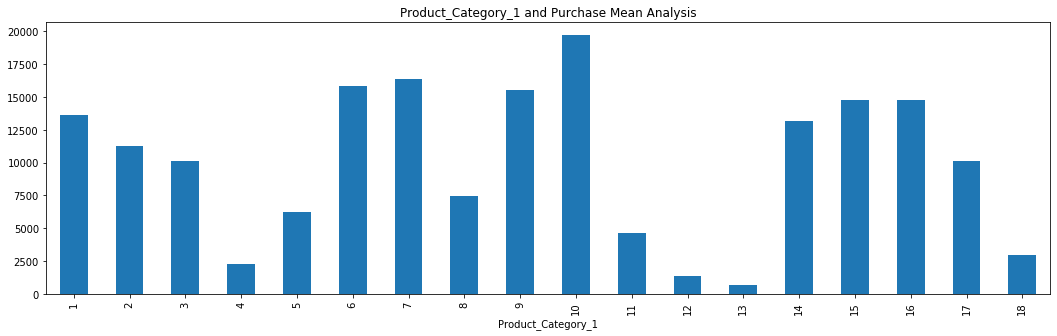

In [156]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

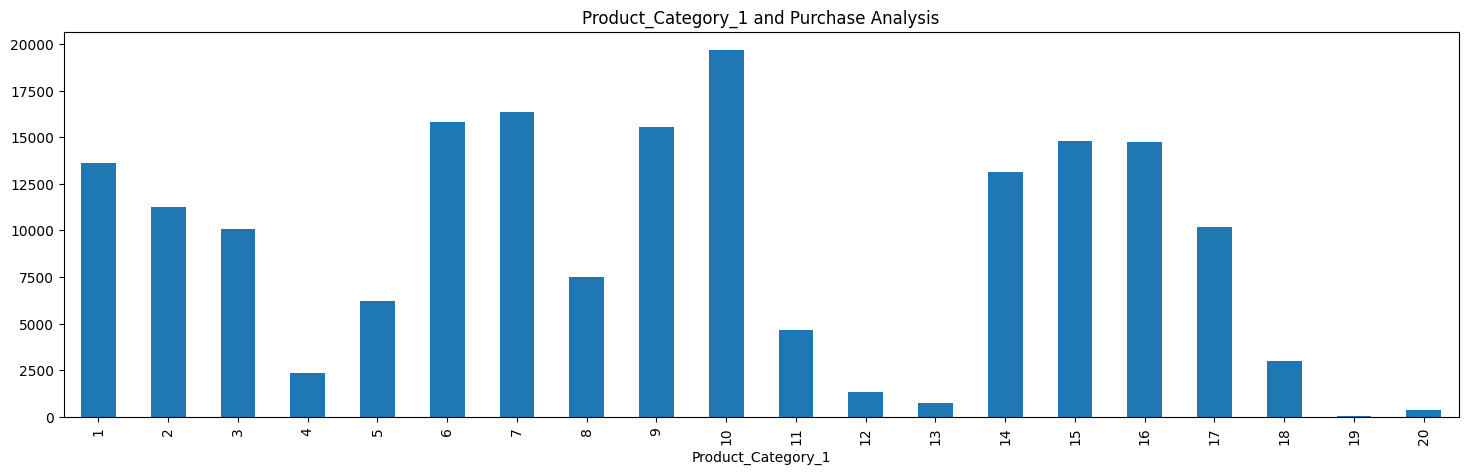

In [4]:
purchase_means_by_product_category=data.groupby("Product_Category_1")["Purchase"].agg(lambda x: x.mean())
purchase_means_by_product_category.plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

### Product_Category_2

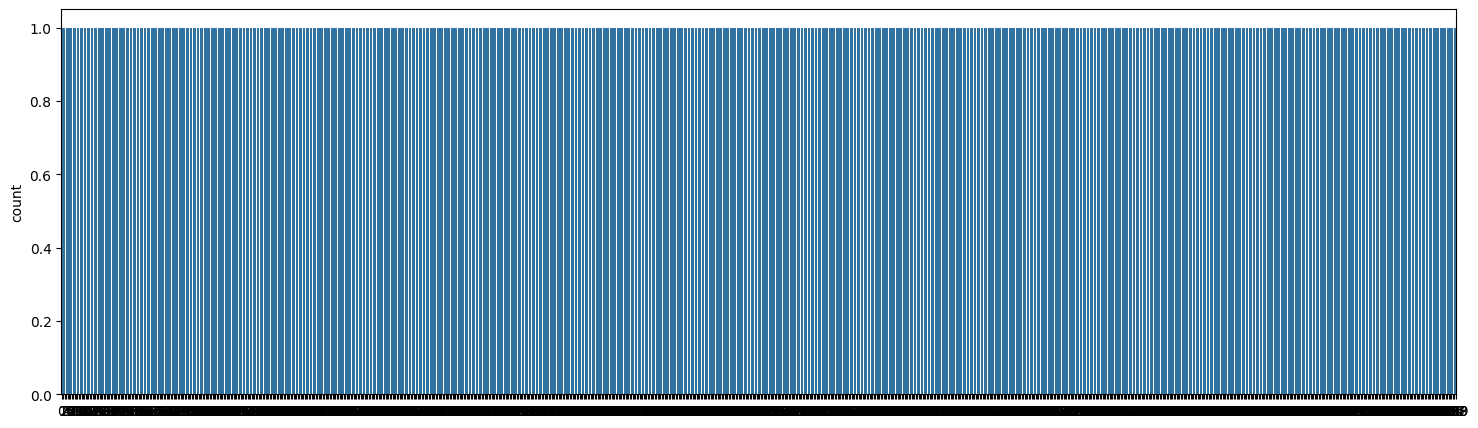

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
    plt.figure(figsize=(18, 5))
    sns.countplot(data['Product_Category_2'].head(1000))
    plt.show()
except KeyboardInterrupt:
    print("KeyboardInterrupt: Code execution interrupted by the user.")


### Product_Category_3

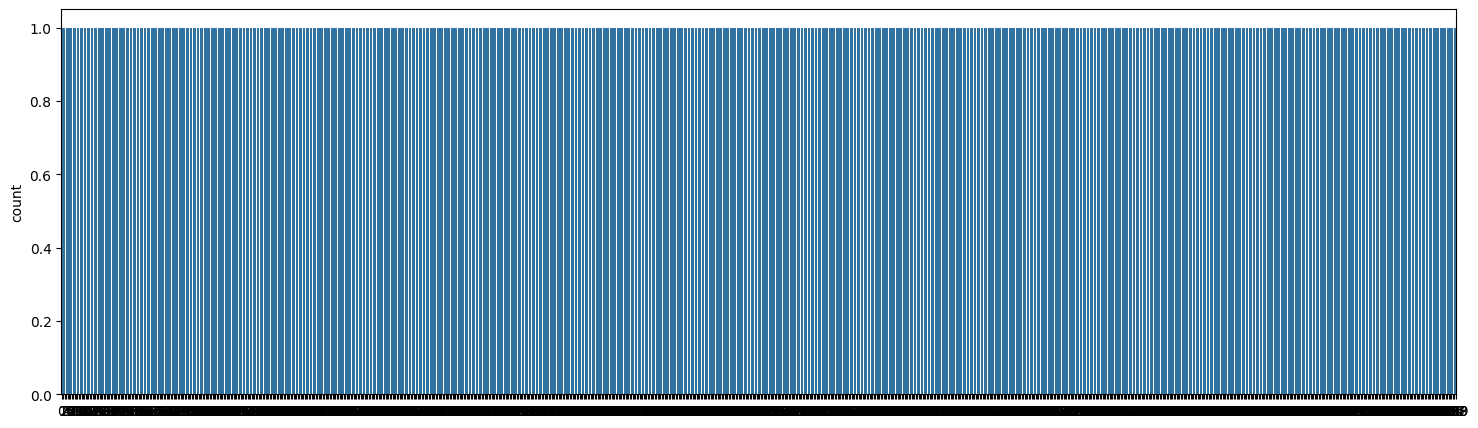

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")
    plt.figure(figsize=(18, 5))
    sns.countplot(data['Product_Category_3'].head(1000))
    plt.show()
except KeyboardInterrupt:
    print("KeyboardInterrupt: Code execution interrupted by the user.")


In [7]:
import pandas as pd

# Load DataFrame from CSV
data = pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")

# Convert 'Product_Category_3' column to string type
data['Product_Category_3'] = data['Product_Category_3'].astype(str)

# Filter out non-numeric values in 'Product_Category_3' column
data['Product_Category_3'] = pd.to_numeric(data['Product_Category_3'], errors='coerce')

# Drop rows with NaN values in 'Product_Category_3' column
data = data.dropna(subset=['Product_Category_3'])

# Drop columns with non-numeric values
data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix without null values
correlation_matrix = data.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)


                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.014519        0.018639            0.010370   
Occupation         -0.014519    1.000000        0.027368           -0.013682   
Marital_Status      0.018639    0.027368        1.000000            0.015682   
Product_Category_1  0.010370   -0.013682        0.015682            1.000000   
Product_Category_2  0.009095    0.001336        0.014813            0.499115   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase           -0.000590    0.025048        0.004603           -0.396558   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.009095            0.003419 -0.000590  
Occupation                    0.001336            0.013263  0.025048  
Marital_Status                0.014813            0.019473  0.004603  
Product_Category_1            0.499115            0.229678 -0.396558  
Prod

## HeatMap

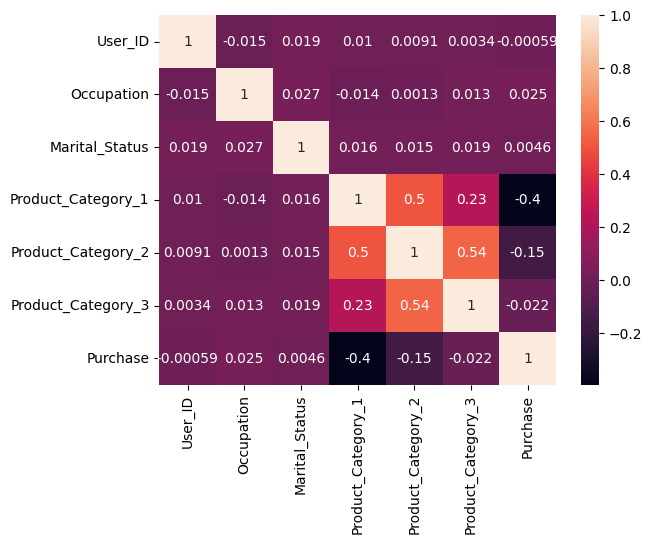

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix,annot=True)
plt.show()

There is a some corellation between the product category groups.

In [10]:
data.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df = data.copy()

In [12]:
df.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,10,0,1,6.0,14.0,15200
6,1000004,7,1,1,8.0,17.0,19215
13,1000005,20,1,1,2.0,5.0,15665
14,1000006,9,0,5,8.0,14.0,5378
16,1000006,9,0,2,3.0,4.0,13055


In [14]:
import pandas as pd

# Load DataFrame from CSV or any other source
# Replace 'path_to_csv' with the actual path to your CSV file
df =pd.read_csv("D:\\Black-Friday-Sales-Prediction-master\\Black-Friday-Sales-Prediction-master\\Data\\BlackFridaySales.csv")


# Check if 'Stay_In_Current_City_Years' column exists in the DataFrame
if 'Stay_In_Current_City_Years' in df.columns:
    # Replace "4+" with "4" in 'Stay_In_Current_City_Years' column
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+", value="4")
    print("Replacement completed successfully!")
else:
    print("Column 'Stay_In_Current_City_Years' not found in the DataFrame.")

# Now you can continue with your data analysis or manipulation


Replacement completed successfully!


In [15]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [17]:
'''import pandas as pd

# Assuming df is your DataFrame
# Check if the column 'Stay_In_Current_City_Years' exists
if 'Stay_In_Current_City_Years' in df.columns:
    # Create dummy variables for the column 'Stay_In_Current_City_Years'
    df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])
else:
    print("Column 'Stay_In_Current_City_Years' does not exist in the DataFrame.")'''


Column 'Stay_In_Current_City_Years' does not exist in the DataFrame.


## Encoding the categorical variables

In [18]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [20]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [21]:
df['Age'] = lr.fit_transform(df['Age'])

In [22]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [24]:
k=data['User_ID']
print(k)

1         1000001
6         1000004
13        1000005
14        1000006
16        1000006
           ...   
545902    1006039
545904    1006040
545907    1006040
545908    1006040
545914    1006040
Name: User_ID, Length: 166821, dtype: int64


In [25]:
df.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True
5,1000003,P00193542,1,2,15,0,0,1,2.0,NaN,15227,False,False,False,True,False
6,1000004,P00184942,1,4,7,1,1,1,8.0,17.0,19215,False,False,True,False,False
7,1000004,P00346142,1,4,7,1,1,1,15.0,NaN,15854,False,False,True,False,False
8,1000004,P0097242,1,4,7,1,1,1,16.0,NaN,15686,False,False,True,False,False
9,1000005,P00274942,1,2,20,0,1,8,NaN,NaN,7871,False,True,False,False,False


In [26]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [27]:
df.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   User_ID                       550068 non-null  int64 
 1   Product_ID                    550068 non-null  object
 2   Gender                        550068 non-null  int32 
 3   Age                           550068 non-null  int32 
 4   Occupation                    550068 non-null  int64 
 5   City_Category                 550068 non-null  int32 
 6   Marital_Status                550068 non-null  int64 
 7   Product_Category_1            550068 non-null  int64 
 8   Product_Category_2            550068 non-null  int64 
 9   Product_Category_3            550068 non-null  int64 
 10  Purchase                      550068 non-null  int64 
 11  Stay_In_Current_City_Years_0  550068 non-null  bool  
 12  Stay_In_Current_City_Years_1  550068 non-null  bool  
 13 

## Dropping the irrelevant columns

In [29]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [30]:
X = df.drop("Purchase",axis=1)
X

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,0,0,False,False,True,False,False
1,0,0,10,0,0,1,6,14,False,False,True,False,False
2,0,0,10,0,0,12,0,0,False,False,True,False,False
3,0,0,10,0,0,12,14,0,False,False,True,False,False
4,1,6,16,2,0,8,0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,0,0,False,True,False,False,False
550064,0,2,1,2,0,20,0,0,False,False,False,True,False
550065,0,2,15,1,1,20,0,0,False,False,False,False,True
550066,0,6,1,2,0,20,0,0,False,False,True,False,False


In [31]:
y=df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [32]:
'''# Check the number of samples in your dataset
print("Number of samples in dataset:", len(X))

# Adjust test_size if necessary
test_size = min(0.3, len(X) / 2)  # Limit test_size to ensure there are enough samples for training

# Proceed with train_test_split using the adjusted test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)


# If everything looks correct, proceed with train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)'''


'# Check the number of samples in your dataset\nprint("Number of samples in dataset:", len(X))\n\n# Adjust test_size if necessary\ntest_size = min(0.3, len(X) / 2)  # Limit test_size to ensure there are enough samples for training\n\n# Proceed with train_test_split using the adjusted test_size\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)\n\n\n# If everything looks correct, proceed with train_test_split\n#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)'

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
lr.intercept_

-1301063315501897.5

In [37]:
lr.coef_

array([ 4.66441043e+02,  1.12198927e+02,  4.98595180e+00,  3.13526861e+02,
       -5.77305242e+01, -3.48488929e+02,  1.29788618e+01,  1.43491437e+02,
        1.30106332e+15,  1.30106332e+15,  1.30106332e+15,  1.30106332e+15,
        1.30106332e+15])

In [38]:
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [40]:
mean_absolute_error(y_test, y_pred)

3532.0123347937533

In [41]:
mean_squared_error(y_test, y_pred)

21397423.90745117

In [42]:
r2_score(y_test, y_pred)

0.15194646230657516

In [43]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.7349586256205


# DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [45]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
dt_y_pred = regressor.predict(X_test)

In [47]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [48]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [49]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [50]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
rf_y_pred = RFregressor.predict(X_test)

In [56]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [57]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [58]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [59]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


# XGBoost Regressor

In [60]:
from xgboost.sklearn import XGBRegressor

In [61]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_y_pred = xgb_reg.predict(X_test)

In [63]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [64]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [65]:
r2_score(y_test, xgb_y_pred)

0.6733735168752393

In [66]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2870.7462594051135


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2879